In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [13]:
#create empty list to store the user data such as names, ratings etc
names = []
ratings = []
reviews = []
reviews_con =[]

url = """https://www.flipkart.com/apple-iphone-15-pink-128-gb/product-reviews/itm7579ed94ca647?pid=MOBGTAGPNMZA5PU5&lid=LSTMOBGTAGPNMZA5PU5AVZNIR&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)

while len(names) <=  500:


    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    #extract customer names
    name = soup.find_all("p", {"class" : "_2NsDsF AwS1CA"})
    for i in name:
        names.append(i.text)

    #extract star ratings
    rating = soup.find_all("div", {"class" : "XQDdHH Ga3i8K"})
    for i in rating:
        ratings.append(i.text)

    #extract review title
    review = soup.find_all("p", {"class" : "z9E0IG"})
    for i in review:
        reviews.append(i.text)
            #extract review content
    review_con = soup.find_all("div", {"class" : "ZmyHeo"})
    for i in review_con:
        reviews_con.append(i.text)
    
    #to go on next page
    try:
        next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[11]")
        next_button.click()
        time.sleep(5)
    except:
        break



In [14]:
df = pd.DataFrame({"CustomerName" : names, "StarRatings" : ratings, "ReviewTitle" : reviews, "ReviewContent": reviews_con})
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Mousam Guha Roy,4,Good choice,Very niceREAD MORE
1,Ajin V,5,Mind-blowing purchase,High quality camera😍READ MORE
2,bijaya mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving ItREAD MORE
...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.READ MORE
106,Jai Singh,5,Must buy!,Very good 👍READ MORE
107,Sakthivel nagalingam,5,Classy product,GoodREAD MORE
108,Flipkart Customer,5,Wonderful,Camera quality is very goodREAD MORE


In [15]:
df["CustomerName"] = df["CustomerName"].str.title()
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Mousam Guha Roy,4,Good choice,Very niceREAD MORE
1,Ajin V,5,Mind-blowing purchase,High quality camera😍READ MORE
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving ItREAD MORE
...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.READ MORE
106,Jai Singh,5,Must buy!,Very good 👍READ MORE
107,Sakthivel Nagalingam,5,Classy product,GoodREAD MORE
108,Flipkart Customer,5,Wonderful,Camera quality is very goodREAD MORE


In [16]:
df["ReviewContent"] = df["ReviewContent"].str.replace("READ MORE", "")
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent
0,Mousam Guha Roy,4,Good choice,Very nice
1,Ajin V,5,Mind-blowing purchase,High quality camera😍
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It
...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.
106,Jai Singh,5,Must buy!,Very good 👍
107,Sakthivel Nagalingam,5,Classy product,Good
108,Flipkart Customer,5,Wonderful,Camera quality is very good


In [17]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [18]:
from nltk.tokenize import PunktSentenceTokenizer
import nltk

nltk.download('punkt')  # Make sure it's the right one

# Create the tokenizer manually using the actual downloaded model
tokenizer = PunktSentenceTokenizer()

# Apply it to your DataFrame
df["ReviewContent_1"] = df["ReviewContent"].apply(lambda x: tokenizer.tokenize(str(x)))

[nltk_data] Downloading package punkt to C:\Users\VINIT
[nltk_data]     JAMBUKA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\VINIT
[nltk_data]     JAMBUKA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1
0,Mousam Guha Roy,4,Good choice,Very nice,[Very nice]
1,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍]
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...,[The iPhone 15 exceeded my expectations in eve...
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It]
...,...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.,[Good phone.]
106,Jai Singh,5,Must buy!,Very good 👍,[Very good 👍]
107,Sakthivel Nagalingam,5,Classy product,Good,[Good]
108,Flipkart Customer,5,Wonderful,Camera quality is very good,[Camera quality is very good]


In [21]:
from textblob import TextBlob
import string
from statistics import mean

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df["Polarity"] = df["ReviewContent_1"].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df["Avg_Polarity"] = df["Polarity"].apply(calculate_average_polarity)

df.head(10)

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1,Polarity,Avg_Polarity
0,Mousam Guha Roy,4,Good choice,Very nice,[Very nice],[0.78],0.780000
1,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍],[0.16],0.160000
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...,[The iPhone 15 exceeded my expectations in eve...,"[0.0, 0.5, 0.9, 0.5, 0.5]",0.480000
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000
5,Nikhil Kumar,5,Awesome,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000
6,Flipkart Customer,5,Worth every penny,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",0.733333
7,Arunji Govindaraju,5,Excellent,Awesome product very happy to hold this. Bette...,"[Awesome product very happy to hold this., Bet...","[1.0, 0.5, 0.45555555555555555]",0.651852
8,Saurabh Gothwad,5,Awesome,Simply premium.,[Simply premium.],[0.0],0.000000
9,Rahul Shedge,5,Brilliant,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,[0.0],0.000000


In [22]:
def sentiment(pol):
    if pol >= 0.75:
        return "Extremely Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Netural"
    elif pol <= -0.75:
        return "Negative"
    else:
        return "Extremely Negative"
    
df["Sentiments"] = df["Avg_Polarity"].apply(sentiment)
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1,Polarity,Avg_Polarity,Sentiments
0,Mousam Guha Roy,4,Good choice,Very nice,[Very nice],[0.78],0.780000,Extremely Positive
1,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍],[0.16],0.160000,Positive
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,Positive
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...,[The iPhone 15 exceeded my expectations in eve...,"[0.0, 0.5, 0.9, 0.5, 0.5]",0.480000,Positive
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,Positive
...,...,...,...,...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.,[Good phone.],[0.7],0.700000,Positive
106,Jai Singh,5,Must buy!,Very good 👍,[Very good 👍],[0.9099999999999999],0.910000,Extremely Positive
107,Sakthivel Nagalingam,5,Classy product,Good,[Good],[0.7],0.700000,Positive
108,Flipkart Customer,5,Wonderful,Camera quality is very good,[Camera quality is very good],[0.9099999999999999],0.910000,Extremely Positive


In [23]:
df["Avg_Polarity"].mean()
#the reviews are positive overall for iphone 15 128 gb

np.float64(0.5020089788578425)

C:\Users\VINIT JAMBUKA\AppData\Local\Temp\ipykernel_23612\3550729626.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Sentiments"], palette=palette, order=df["Sentiments"].value_counts().index)
C:\Users\VINIT JAMBUKA\AppData\Local\Temp\ipykernel_23612\3550729626.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\VINIT JAMBUKA\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


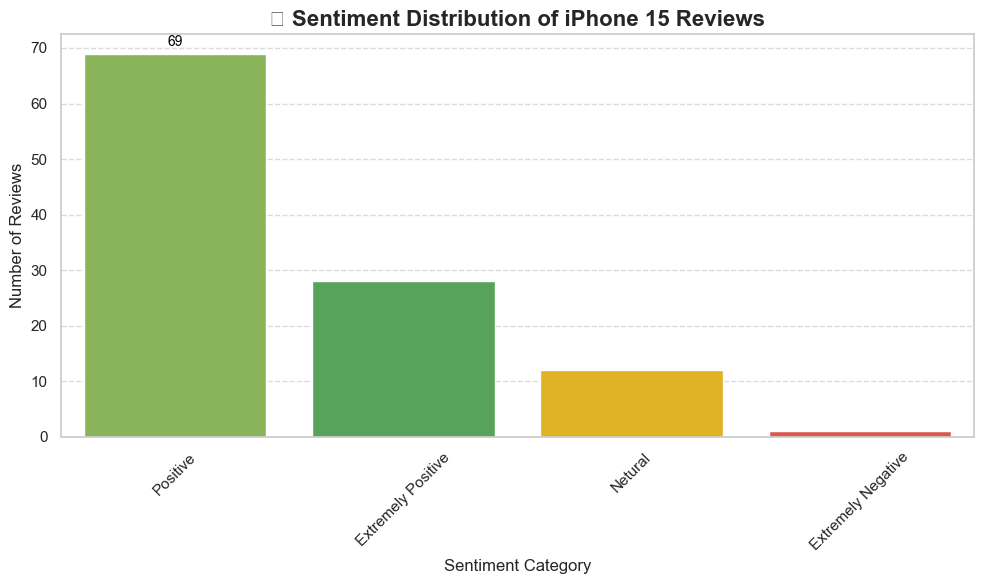

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set(style="whitegrid")

# Define color palette for sentiment categories
palette = {
    "Extremely Positive": "#4CAF50",
    "Positive": "#8BC34A",
    "Netural": "#FFC107",
    "Negative": "#FF5722",
    "Extremely Negative": "#F44336"
}

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df["Sentiments"], palette=palette, order=df["Sentiments"].value_counts().index)

# Add labels on top of bars
ax.bar_label(ax.containers[0], padding=3, fontsize=10, color='black')

# Title and axis labels
plt.title("📊 Sentiment Distribution of iPhone 15 Reviews", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add light gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid cutoff
plt.tight_layout()

# Show plot
plt.show()


In [25]:
df["Review Length"] = df["ReviewContent"].apply(lambda x : len(x.split()))
df

,CustomerName,StarRatings,ReviewTitle,ReviewContent,ReviewContent_1,Polarity,Avg_Polarity,Sentiments,Review Length
0,Mousam Guha Roy,4,Good choice,Very nice,[Very nice],[0.78],0.780000,Extremely Positive,2
1,Ajin V,5,Mind-blowing purchase,High quality camera😍,[High quality camera😍],[0.16],0.160000,Positive,3
2,Bijaya Mohanty,5,Worth every penny,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,Positive,10
3,Varsha Sadanand Salve,5,Mind-blowing purchase,The iPhone 15 exceeded my expectations in ever...,[The iPhone 15 exceeded my expectations in eve...,"[0.0, 0.5, 0.9, 0.5, 0.5]",0.480000,Positive,72
4,Prithivi Boruah,5,Just wow!,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,Positive,6
...,...,...,...,...,...,...,...,...,...
105,Vivek Gupta,5,Fabulous!,Good phone.,[Good phone.],[0.7],0.700000,Positive,2
106,Jai Singh,5,Must buy!,Very good 👍,[Very good 👍],[0.9099999999999999],0.910000,Extremely Positive,3
107,Sakthivel Nagalingam,5,Classy product,Good,[Good],[0.7],0.700000,Positive,1
108,Flipkart Customer,5,Wonderful,Camera quality is very good,[Camera quality is very good],[0.9099999999999999],0.910000,Extremely Positive,5


C:\Users\VINIT JAMBUKA\AppData\Local\Temp\ipykernel_23612\2592982309.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sentiments", loc='upper right')
C:\Users\VINIT JAMBUKA\AppData\Local\Temp\ipykernel_23612\2592982309.py:12: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\VINIT JAMBUKA\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


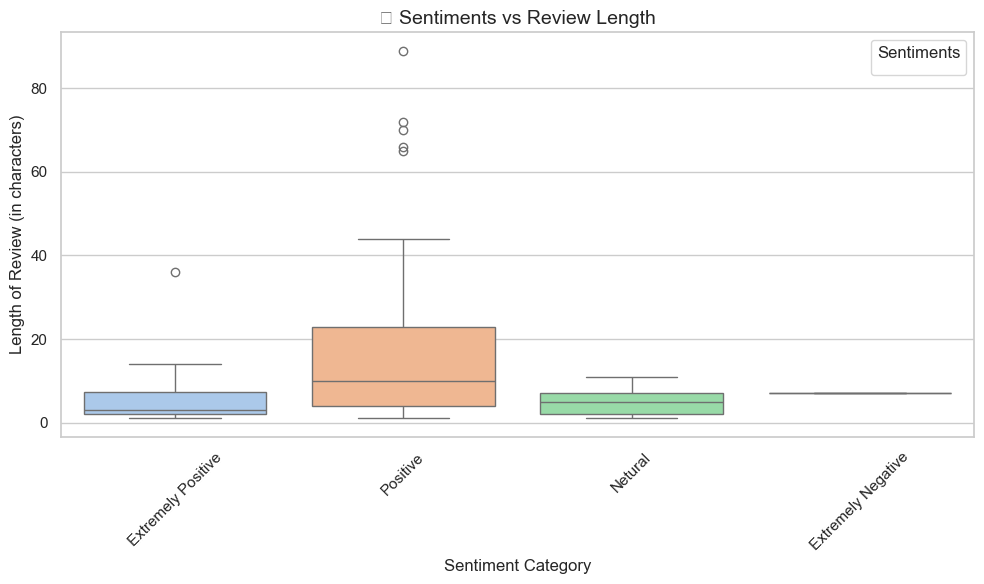

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sentiments", y="Review Length", data=df, hue="Sentiments", palette="pastel")

# Adding axis labels and chart title
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Length of Review (in characters)", fontsize=12)
plt.title("📌 Sentiments vs Review Length", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Sentiments", loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
